编写与修订: @\_散沙\_Python玩家\_

# Concrete Math with Python I
### Python带你游览具体世界的数学基础

一般来说，高深的数学总会让人有种抗拒心理，但跟具体世界紧密联系的简单数学知识会则不容易让人有如下的疑问：

**"我们知道这些知识到底有什么用处？"**

这些数学知识第一次出现在高中、大学课本时可能会让人摸不到头脑，而他们往往是基础的计算机科学、统计学、经济学知识的基石。

这部分内容包括：

* 数列与金融基础
* 排列组合与概率基础
* 方程组/矩阵
* 线性规划
* 质数与加密
* 随机数与概率分布

### 注意：具备扎实的高中数学、理工科本科数学基础的朋友可以简单阅览或者跳过这一部分。


In [1]:
import numpy as np
import scipy as sp
import scipy.signal as ssig
import bokeh as bk
import bokeh.plotting as bplt
import bokeh.palettes as bpal


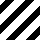
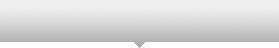
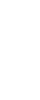
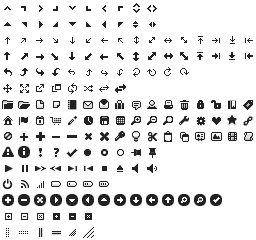
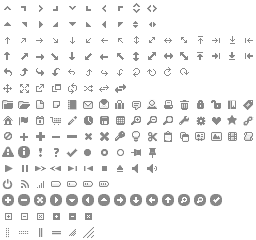
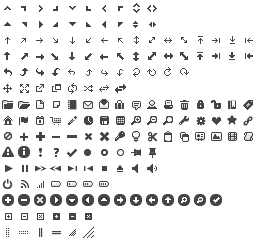
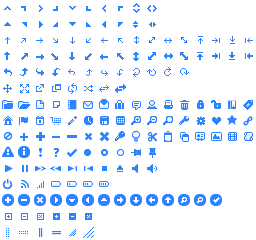
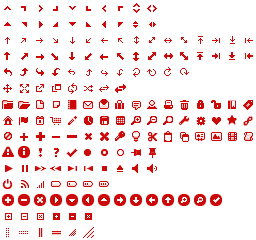
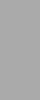
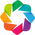
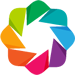
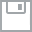
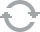
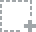
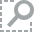
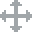
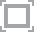
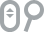

In [2]:
# 工具配置
TOOLS = "pan,wheel_zoom,box_zoom,box_select"
# 作图配置
plot_config = dict(plot_width=800, plot_height=500, tools=TOOLS)
bplt.output_notebook()


# 1 数列基础: 等差数列与等比数列

假设我们不断的投资年利率永远为5%的国债。

这句话的意思是说，该种国债在0时刻购买时付出1元钱，而在1年后(时刻为1)按约定取回1.05元。

我们可以反复的在第T年买入1元钱的国债，再在第T+1年获得相应的0.05元收益，那么我们的资金曲线就是线性增长的如下图所示：

In [3]:
capital_curve_1 = np.linspace(1,2,21)
print capital_curve_1


p1 = bplt.figure(title="等量购买国债的资金曲线",
       background_fill="#FFFFFF",**plot_config)

p1.line(np.arange(21), capital_curve_1, line_width=3, color='steelblue', legend='等差数列')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以年为单位记)'
p1.yaxis.axis_label = '资金量'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

[ 1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55
  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.  ]


### 聪明的投资者会怎么做？"复利投资"

他们会把所有的钱（返回手中的1元本金以及0.05元利息）再次全部买入国债。因为利息也可以用来投资，比前一年能够购买的份数多了。

In [4]:
capital_curve_2 = np.array([1.05**i for i in range(21)])
print capital_curve_2

p1 = bplt.figure(title="再投资式购买国债的资金曲线",
       background_fill="#FFFFFF",**plot_config)

p1.line(np.arange(21), capital_curve_1, line_width=3, color='steelblue', legend='等差数列')
p1.line(np.arange(21), capital_curve_2, line_width=3, color='darkred', legend='等比数列')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以年为单位记)'
p1.yaxis.axis_label = '资金量'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

[ 1.          1.05        1.1025      1.157625    1.21550625  1.27628156
  1.34009564  1.40710042  1.47745544  1.55132822  1.62889463  1.71033936
  1.79585633  1.88564914  1.9799316   2.07892818  2.18287459  2.29201832
  2.40661923  2.5269502   2.65329771]


### 可怕的复利：评估长期资产增值能力的手段

In [5]:
capital_curve_1 = np.linspace(1,6,101)
capital_curve_2 = np.array([1.05**i for i in range(101)])

p1 = bplt.figure(title="再投资式购买国债的资金曲线（100年）",
       background_fill="#FFFFFF",**plot_config)

p1.line(np.arange(101), capital_curve_1, line_width=3, color='steelblue', legend='等差数列')
p1.line(np.arange(101), capital_curve_2, line_width=3, color='darkred', legend='等比数列')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以年为单位记)'
p1.yaxis.axis_label = '资金量'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)


In [6]:
p1 = bplt.figure(title="再投资式购买国债的资金曲线（100年，对数坐标）",
       background_fill="#FFFFFF",y_axis_type="log",**plot_config)

p1.line(np.arange(101), capital_curve_1, line_width=3, color='steelblue', legend='等差数列')
p1.line(np.arange(101), capital_curve_2, line_width=3, color='darkred', legend='等比数列')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以年为单位记)'
p1.yaxis.axis_label = '资金量(对数坐标)'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

* 等差数列: 数列前后之差相等，在曲线图上是一条直线；
* 等比数列: 数列前后之比相等，在y坐标为对数坐标的对数图上是一条直线。

### 小知识: 72法则

年利率为5%时，不追加投资（资金曲线为等差数列）时，1元钱要投资20年才能变成2元钱；

如果换为追加投资的形式（资金曲线为等比数列）时，1元钱要投资多久才能变成2元钱？（等比数列前后项之比为1.05时，哪一项最接近2.0?）

在年利率为3%~24%时（这个范围包含了绝大多数利率，从国债利率到信用卡欠款惩罚性利率）的不同条件下，我们的72法则与精确值作比较：

In [7]:
for x in range(3,24):
    print '{: >3}%  -- {: >6.2f}{: >6.2f}'.format(x,72.0/x,np.log(2)/np.log(1.0+x/100.0))
    

  3%  --  24.00 23.45
  4%  --  18.00 17.67
  5%  --  14.40 14.21
  6%  --  12.00 11.90
  7%  --  10.29 10.24
  8%  --   9.00  9.01
  9%  --   8.00  8.04
 10%  --   7.20  7.27
 11%  --   6.55  6.64
 12%  --   6.00  6.12
 13%  --   5.54  5.67
 14%  --   5.14  5.29
 15%  --   4.80  4.96
 16%  --   4.50  4.67
 17%  --   4.24  4.41
 18%  --   4.00  4.19
 19%  --   3.79  3.98
 20%  --   3.60  3.80
 21%  --   3.43  3.64
 22%  --   3.27  3.49
 23%  --   3.13  3.35


当你对某种属性不变资产进行投资，花了一定时间从10万元积累到了100万元，那么在同样条件下花同样的时间可以从100万元累计到1000万元（比例相等）

从10万元累计到1000万元翻了100倍，在同样外界条件下需要花的时间是2倍。这个计算等价于，以10倍为底求100的对数就是2。

In [8]:
np.log10(100)


2.0

### 以防万一

为了避免捡了西瓜丢了芝麻，还是要介绍一下等差数列与等比数列的求和公式：

等差数列求和公式：(首项+末项)\*项数/2，这里还是用幼年高斯的例子。

In [9]:
gauss_series =  np.arange(100)+1
print gauss_series.sum(),(1+100)*100/2

5050 5050


等比数列求和公式：前后项之比为x时可以利用公式：(x不等于1时始终成立)

$$\sum_{k=0}^n x^k = 1+x+x^2+...x^n = \frac{1-x^{n+1}}{1-x}$$

# 2. 更复杂的数列与概念


刚才我们提到的数列的性质还是比较简单，因为:
    
* 数列的后一项仅仅和前一项有关
* 在第一个性质的基础上，我们的计算规则要么是"乘以常数"，要么是"加上常数"，太简单了。

具有第一个性质的数列，我们统称为"一阶递推数列"。

而我们把第二个性质稍为改一改，如果同时乘以前一项的常数，再加上第二个常数，把乘法和加法混在一起后，事情就复杂了。

这时数列不再是等差数列或者等比数列那么简单了...但只要我们能理解递推公式，也不是很复杂。

### 递推公式，通项公式，数学归纳法

等差数列 $1,1.05,1.10,1.15...$ 的递推公式是$A_{n+1} = A_{n} + 0.05$，也就是后一项需要前一项推导出来。

In [10]:
A = np.float64(np.zeros_like(np.arange(21)))
A[0] = 1.0
for i in range(1,len(A)):
    A[i] = A[i-1] + 0.05
print A


[ 1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55
  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.  ]


我们换个写法，把递推公式改成通项公式，也就是适合于每一项的公式：$A_{n} = A_{0}+0.05n$，我们可以自己验证结果的正确性。

同时我们如果去做如下的验证：（如下两点便称为数学归纳法）

* 通项公式在第0项满足条件
* 通项公式如果在第k项满足条件的话，那么在第k+1项也满足条件

验证通项公式代入递推公式：

$$A_{n+1}= A_0+0.05(n+1)\\
A_n +0.05 = A_0+0.05n+0.05 = A_0 + 0.05(n+1)$$

这时我们发现，第0项，第1项，第2项...一直递推下去，所有项都满足条件。我们不使用循环一样可以得到任意长的关于A的序列。

可见，从**递推公式**出发，使用**数学归纳法**，求得**通项公式**是

In [11]:
print np.array([0.05*i for i in range(21)])+1.0


[ 1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55
  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.  ]


同理我们可以照猫画虎的对等比数列使用同样的伎俩：

等比数列$1,1.05,1.1025,...$的递推公式是$A_{n+1} = A_{n}*1.05$，如果用递推公式仍然需要循环：

In [12]:
A = np.float64(np.zeros_like(np.arange(21)))
A[0] = 1.0
for i in range(1,len(A)):
    A[i] = A[i-1]*1.05
print A


[ 1.          1.05        1.1025      1.157625    1.21550625  1.27628156
  1.34009564  1.40710042  1.47745544  1.55132822  1.62889463  1.71033936
  1.79585633  1.88564914  1.9799316   2.07892818  2.18287459  2.29201832
  2.40661923  2.5269502   2.65329771]


但是经过简单的对通项公式的推理之后，得到$A_{n} = A_0 * 1.05^n$ ：

In [13]:
print np.array([1.05**i for i in range(21)])

[ 1.          1.05        1.1025      1.157625    1.21550625  1.27628156
  1.34009564  1.40710042  1.47745544  1.55132822  1.62889463  1.71033936
  1.79585633  1.88564914  1.9799316   2.07892818  2.18287459  2.29201832
  2.40661923  2.5269502   2.65329771]


### 一阶线性递推数列

回到正题，刚才我们说到，要把加法和乘法混在一起。这种情况下我们就获得了更为一般的递推数列，称为**一阶线性递推数列**，因为

* 我们在计算时没有使用超过1项的序列历史，所以是一阶
* 我们也没有使用前一项的平方、立方...仅仅使用了乘以常数或者加上常数的操作，所以是线性

小李参加了一种定投，从第1个月末开始投入1元，每个月产生0.4%的复利。

但是每个月除了把利息再投资以外，他也会追加1元的投资，这样我们就有递推公式：

$A_{0} = 0\\
A_{n+1} = A_{n}*1.004+1$


In [14]:
A = np.float64(np.zeros_like(np.arange(361)))
A[0] = 0.0
for i in range(1,len(A)):
    A[i] = A[i-1]*1.004+1.0
print A[:20]

[  0.           1.           2.004        3.012016     4.02406406
   5.04016032   6.06032096   7.08456225   8.11290049   9.1453521
  10.1819335   11.22266124  12.26755188  13.31662209  14.36988858
  15.42736813  16.48907761  17.55503392  18.62525405  19.69975507]


In [24]:
p1 = bplt.figure(title="理财定投购买货币基金的资金曲线（30年）",
       background_fill="#FFFFFF",**plot_config)

p1.line(np.arange(361), A, line_width=3, color='steelblue', legend='定投资金曲线')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以月为单位记)'
p1.yaxis.axis_label = '资金量(线性坐标)'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

In [16]:
p1 = bplt.figure(title="理财定投购买货币基金的资金曲线（30年，对数坐标）",
       background_fill="#FFFFFF",y_axis_type="log",**plot_config)

p1.line(np.arange(1,361), A[1:], line_width=3, color='steelblue', legend='定投资金曲线')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以月为单位记)'
p1.yaxis.axis_label = '资金量(对数坐标)'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

我们发现，

### 资金曲线前半段在普通y轴上是线性的，而到后半段在对数图y轴上是线性的。

这种奇葩的**一阶线性递推数列**，我们习惯性的问：怎么求通项？

处理这种问题最好的方法就是，两侧加上一个常数，使两侧的常数项之比刚好等于1.004。

$$A_0 = 0\\
A_{n+1} = A_{n}*1.004+1\\
A_{n+1}+250 = A_{n}*1.004+251 = 1.004*(A_{n}+250)$$

这时这个奇葩露出了真面目：A+250是一个以250为初始项的等比数列。

$A_{n} = 250*1.004^n-250$

比较一下。

In [17]:
print (250.0*np.array([1.004**i for i in range(361)])-250.0)[-20:]
print A[-20:]

[ 725.29517696  729.19635766  733.11314309  737.04559567  740.99377805
  744.95775316  748.93758417  752.93333451  756.94506785  760.97284812
  765.01673951  769.07680647  773.1531137   777.24572615  781.35470906
  785.48012789  789.6220484   793.7805366   797.95565874  802.14748138]
[ 725.29517695  729.19635766  733.11314309  737.04559567  740.99377805
  744.95775316  748.93758417  752.93333451  756.94506785  760.97284812
  765.01673951  769.07680647  773.1531137   777.24572615  781.35470906
  785.48012789  789.6220484   793.7805366   797.95565874  802.14748138]


# 3. 一阶数列的一种应用：等额本息贷款

举个简单的例子，如果我们已经有购房的打算，并且准备每个月还款1万(本金+利息)，分30年还清。

如果简单假设月利率一直保持0.4%，并且要达到等额本息贷款（也就是每个月还的利息＋本金为定值）的效果，每个月该还多少钱呢？

听上去十分复杂，实际我们可以通过建立简单的金融知识体系来理解这一过程：

## 『金钱具有时间价值』

### 现金流(Cash Flow)，未来值(Future Value)，现值(Present Value)

现金流：一组在不同时间点上发生的现金收入或者支出称为现金流。

首先我们换个思考问题的方式：假如我们没有做贷款，我们也要每个月投入等额的钱以0.4%的利息利滚利，最后在30年之后获得一笔钱，这不就是定投吗？

这说明一件事情，如下三种现金流中，所有的现金支出和现金收入的价值相等

* 在第0个月获得了银行的贷款，从第1个月末到第360个月末坚持等额出资1元偿还贷款
* 从第1个月末到第360个月末坚持定投1元，从而在360个月末拥有802.147元
* 在第0个月把老爸的一笔钱全部投入银行，每月利滚利最终在360个月末拥有802.147元

In [18]:
t = np.arange(361)
cf1 = np.array([A[-1]*(1.004**(-360))]+[-1]*360)
cf2 = np.array([-1]*360+[A[-1]])
cf3 = np.array([-A[-1]*(1.004**(-360)),A[-1]])

In [23]:
p1 = bplt.figure(title="30年贷款并等额本息还款（可放大）",
       background_fill="#FFFFFF",**plot_config)

p1.set(x_range=bk.models.Range1d(-5,20),y_range=bk.models.Range1d(-2,4))

for tp in t:
    if cf1[tp]>0:
        p1.line(np.array([tp,tp]), np.array([0,cf1[tp]]), line_width=3, color='steelblue', legend='获得贷款')
    else:
        p1.line(np.array([tp,tp]), np.array([0,cf1[tp]]), line_width=3, color='darkred', legend='等额本息还款')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以月为单位记)'
p1.yaxis.axis_label = '现金收支'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

In [21]:
p1 = bplt.figure(title="30年定投理财现金流（可放大）",
       background_fill="#FFFFFF",**plot_config)

p1.set(x_range=bk.models.Range1d(340,365),y_range=bk.models.Range1d(-2,4))

for tp in t:
    if cf2[tp]>0:
        p1.line(np.array([tp,tp]), np.array([0,cf2[tp]]), line_width=3, color='steelblue', legend='银行账户结余')
    else:
        p1.line(np.array([tp,tp]), np.array([0,cf2[tp]]), line_width=3, color='darkred', legend='每月定投')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以月为单位记)'
p1.yaxis.axis_label = '现金收支'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

In [22]:
p1 = bplt.figure(title="30年定期按月复利储蓄",
       background_fill="#FFFFFF",**plot_config)

p1.line([0,360],[0,0], line_width=1, color='black')

for tp in [0,360]:
    if cf3[tp/360]>0:
        p1.line(np.array([tp,tp]), np.array([0,cf3[tp/360]]), line_width=5, color='steelblue', legend='银行账户结余')
    else:
        p1.line(np.array([tp,tp]), np.array([0,cf3[tp/360]]), line_width=5, color='darkred', legend='储蓄金额')

p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '时间(以月为单位记)'
p1.yaxis.axis_label = '现金收支'
p1.ygrid.band_fill_color="steelblue"
p1.ygrid.band_fill_alpha = 0.1

bplt.show(p1)

在这个例子中，如下几个定义分别有了具体的概念：

* 现值：0时刻现金的数额，比如银行的那笔贷款，或者老爸的这笔钱。
* 每月等额支付现金流：在不同时刻一组现金变动的总和，在我们的例子里，不管是贷款还款还是做了定投，现金流都是连续360个月每月支出1元
* 未来值：在第360个月末银行账户上所有的802.147元

这三者拥有相同的价值！

我们在第三个例子中反推老爸给的钱：一笔未来值通过利率折算成为现值，就叫做折现。给定等比数列的第360项，求第0项：

In [65]:
A[-1]*(1.004**(-360))

190.59768130781205

同样我们还可以在第一个例子中反推一组现金流折算的现值。360笔1元钱分别是不同等比数列的第1、第2、...第360项时，那些数列中第0项的总和：

In [66]:
np.array([1.004**(-i) for i in range(1,361)]).sum()

190.59768130781202

可以看出两种折算确实是等价的。

# 4. 比一阶更复杂的数列：时间序列的准备知识

考虑一个经典问题：Fibonacci（斐波那契）数列。

假设小张养的兔子都能连续生2年小兔，每一年生一对。假设新出生的小兔子到1岁的时候也能生了。

第0年时，小张有一对刚出生的小兔。于是第1年时，这对小兔生了一对刚出生的小兔。

第2年时，第0年的老兔和第1年的小兔同时生下了刚出生的小兔一共2对，以此类推。

第n年时，刚出生的小兔有多少对？如果想不清楚，我们仍然要先写好**递推公式**：

$F_{0} = 1 \\
F_{1} = 1 \\
F_{n+2} = F_{n+1} + F_{n}$

我们先用循环实现一遍：

In [23]:
N = 21
F = np.zeros_like(np.arange(N))
F[0] = 1
F[1] = 1
for i in range(2,N):
    F[i] = F[i-1]+F[i-2]

print F

[    1     1     2     3     5     8    13    21    34    55    89   144
   233   377   610   987  1597  2584  4181  6765 10946]


我们使用迭代函数实现一遍：

In [24]:
def Fibonacci(n):
    N = np.int64(n)
    if N<0:
        return None
    elif N in [0,1]:
        return 1
    else:
        return Fibonacci(N-1)+Fibonacci(N-2)

F = [Fibonacci(i) for i in range(21)]
print F

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946]


当然，在Python语言中，为了将这个功能函数化我不会推荐第一种方法；

而如果关心性能，第二种方法又明显不合适（太多次调用自己引起栈溢出），当n太大的时候程序就会报错了。

对于这种迭代类型的函数还可以进行进一步的优化，直接不加修改地给出一个好思路，原始接链在http://code.activestate.com/recipes/474088/

In [42]:
import sys

class TailRecurseException:
    def __init__(self, args, kwargs):
        self.args = args
        self.kwargs = kwargs

def tail_call_optimized(g):
    def func(*args, **kwargs):
        f = sys._getframe()
        if f.f_back and f.f_back.f_back \
            and f.f_back.f_back.f_code == f.f_code:
            raise TailRecurseException(args, kwargs)
        else:
            while 1:
                try:
                    return g(*args, **kwargs)
                except TailRecurseException, e:
                    args = e.args
                    kwargs = e.kwargs
        func.__doc__ = g.__doc__
    return func

@tail_call_optimized
def fib(i, current = 1, next = 1):
    if i == 0:
        return current
    else:
        return fib(i - 1, next, current + next)

print [fib(i) for i in range(21)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946]


通过程序解决问题当然是我们强有力的一种手段，但往往结合数学知识与计算机知识会让事情变的简单。

## 二阶线性递推数列——斐波那契数列

根据问题定义：

$F_{0} = 1 \\
F_{1} = 1 \\
F_{n+2} = F_{n+1} + F_{n}$

* 除了前两项是常数以外，后面的项是需要根据前两项推导出来，所以它是二阶递推数列
* 只出现了加法，还是在线性的范畴内

我们称$F_{n}$为$F_{n+1}$的一阶滞后项，称$F_{n}$为$F_{n+2}$的二阶滞后项。

$$F_{n+2} = B F_{n+2} + B^2 F_{n+2}$$

简化：$$F = B*F + B^2*F$$

求解初中数学：$$(1-B-B^2)F = 0\\
(1-\frac{1-\sqrt{5}}{2}B)(1-\frac{1+\sqrt{5}}{2}B)F = 0$$

然后我们就得到了两个仅含一阶滞后算子的解，每个解跟等比数列的形式都一样：

$$(1-\frac{1-\sqrt{5}}{2}B)F = 0, (1-\frac{1+\sqrt{5}}{2}B)F = 0$$

通项公式：

$$F_{n} = a*(\frac{1-\sqrt{5}}{2})^n + b*(\frac{1＋\sqrt{5}}{2})^n$$

这时如果我们知道

$$F_{0} = a＋b ＝ 1\\
F_{1} = a*(\frac{1-\sqrt{5}}{2})+b*(\frac{1＋\sqrt{5}}{2})＝1 $$

根据这个**二元一次方程组**，我们先用一些作弊的方式求解（更具体的方式会在矩阵基础部分介绍）

In [30]:
A = np.mat([[1,1],[(1-np.sqrt(5))/2,(1+np.sqrt(5))/2]])
y = np.array([1,1])
res =  A.I.dot(y)

print res

[[ 0.2763932  0.7236068]]


好吧我知道看着比较不带感是因为它毕竟不是分数而是小数，总之我们还是有方法知道：

$a = \frac{1-1/\sqrt{5}}{2}\\
b = \frac{1＋1/\sqrt{5}}{2}$

顺手验证一下：

In [43]:
print (1-1/np.sqrt(5))/2 , (1+1/np.sqrt(5))/2

0.27639320225 0.72360679775


最后见证奇迹的时刻到来了：现在我们有精确表达式了！

$F_{n} = a*(\frac{1-\sqrt{5}}{2})^n + b*(\frac{1＋\sqrt{5}}{2})^n$

把$a,b$代入之后究竟是什么呢？

In [44]:
def fakefib(n):
    a = (1-1/np.sqrt(5))/2
    b = (1+1/np.sqrt(5))/2
    return a*(((1-np.sqrt(5))/2)**n)+b*(((1+np.sqrt(5))/2)**n)

print [fakefib(i) for i in range(21)]

[1.0, 0.99999999999999989, 2.0, 3.0, 5.0, 8.0000000000000018, 13.000000000000004, 21.000000000000004, 34.000000000000014, 55.000000000000021, 89.000000000000028, 144.00000000000003, 233.00000000000009, 377.00000000000011, 610.00000000000023, 987.00000000000045, 1597.0000000000009, 2584.0000000000014, 4181.0000000000027, 6765.0000000000036, 10946.000000000005]


因为计算精度问题，显得不够整洁！那么四舍五入以及取整。

In [35]:
print [np.int64(np.round(fakefib(i))) for i in range(21)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946]


### 小知识：斐波那契数列前项比后项会趋近于一个数字...

In [46]:
1/((1+np.sqrt(5))/2)

0.61803398874989479

这就是我们熟悉的黄金分割数。

### 时间序列简介

在时间序列的模型中，如果我们再遇到有一阶或者高阶线性递推数列，相关的简单分析我们已经能够在滞后算子B的辅助下找到数列的通项公式了。

能够良好的理解滞后算子B，对于时间序列分析是相当有帮助的。

### 时间序列应用：量化投资之技术指标KDJ计算

一个序列$C = [C_1,C_2,...]$已经准备好了，而计算相应的K序列时，

$$K_0 = 50\\
K_{n+1}= \frac{2}{3}K_{n}+\frac{1}{3}C_{n+1}$$

这样，KDJ指标的递推公式与初始值就被定义好了。使用滞后算子，会得到更好的形式：

$$(1-\frac{2}{3}B)K = \frac{1}{3} C$$

如果你觉得最后一个公式十分眼熟的话，你可以和SciPy部分signal(信号处理)的内容进行类比，因为这完全满足ARMA模型。

我们把$K_0 = 50$的初始条件直接替换为$C_0 = 150$，我们尝试一下原有C序列用迭代法或时间序列法能否得到一致的结果：



In [53]:
C = np.array([50,70,32,58,0,23,99])
# 方法1
K1 = np.float64(np.zeros_like(C))
K1[0] = 2.0/3*50+1.0/3*C[0]
for i in range(1,len(C)):
    K1[i] = K1[i-1]*2.0/3+1.0/3*C[i]

print K1

[ 50.          56.66666667  48.44444444  51.62962963  34.41975309
  30.61316872  53.40877915]


在方法2里我们把K和C序列关系的参数，以及增补过的C序列放入滤波器里，得到K[-1]=50的序列

In [57]:
# 方法2
C2 = np.array([150]+list(C))

print ssig.lfilter(np.array([1.0/3]),np.array([1.0,-2.0/3]),C2)

[ 50.          50.          56.66666667  48.44444444  51.62962963
  34.41975309  30.61316872  53.40877915]


可以看到，这两种方式的计算，除了序列头部差了一个值，其他都一样。

# 5 小结

在本次内容中，我们从等差数列、等比数列等最基础的内容开始复习，结合现金流等内容理解了数列问题在金融方面的应用。

同时，对于一阶或者高阶的递推数列的重要概念以及应用有了更深的认识。

